In [1]:
import pandas as pd
import numpy as np

In [2]:
mystock_data = pd.read_csv('data.tsv', sep="\t")
mystock_data.head()

,Date,Open,High,Low,Close,Volume
0,21-07-2014,83.46,83.53,81.81,81.93,2359300
1,18-07-2014,83.30,83.40,82.52,83.35,4020800
2,17-07-2014,84.35,84.63,83.33,83.63,1974000
3,16-07-2014,83.77,84.91,83.66,84.91,1755600
4,15-07-2014,84.30,84.38,83.20,83.58,1874700


In [3]:
mystock_data["Date"].iloc[0]

'21-07-2014'

In [4]:
mystock_data = mystock_data [['Date','Open','Close']] 
mystock_data ['Date'] = pd.to_datetime(mystock_data['Date'])
mystock_data.set_index('Date',drop=True,inplace=True) 
mystock_data.head()

,Open,Close
Date,,
2014-07-21,83.46,81.93
2014-07-18,83.30,83.35
2014-07-17,84.35,83.63
2014-07-16,83.77,84.91
2014-07-15,84.30,83.58


In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
mystock_data[mystock_data.columns] = Ms.fit_transform(mystock_data)
training_size = round(len(mystock_data) * 0.8)
train_data = mystock_data[:training_size]
test_data  = mystock_data[training_size:]

In [7]:
# train_data.reset_index()

In [8]:
def create_sequence(dataset):
    sequences = []
    labels = []
    start_idx = 0
    for stop_idx in range(50,len(dataset)): 
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return np.array(sequences), np.array(labels)

In [9]:
train_seq,train_label = create_sequence(train_data)
test_seq,test_label = create_sequence(test_data)

In [10]:
train_seq.shape

(2964, 50, 2)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import tensorflow as tf

In [12]:
train_seq_tensor = tf.convert_to_tensor(train_seq)
train_label_tensor = tf.convert_to_tensor(train_label)
test_seq_tensor = tf.convert_to_tensor(test_seq)
test_label_tensor = tf.convert_to_tensor(test_label)

In [13]:
train_seq_tensor

<tf.Tensor: shape=(2964, 50, 2), dtype=float64, numpy=
array([[[0.74451429, 0.73029339],
        [0.74261653, 0.74702486],
        [0.75507057, 0.75032402],
        ...,
        [0.74854703, 0.74490397],
        [0.74510734, 0.75103099],
        [0.7493773 , 0.74867444]],

       [[0.74261653, 0.74702486],
        [0.75507057, 0.75032402],
        [0.7481912 , 0.76540591],
        ...,
        [0.74510734, 0.75103099],
        [0.7493773 , 0.74867444],
        [0.7326533 , 0.74879227]],

       [[0.75507057, 0.75032402],
        [0.7481912 , 0.76540591],
        [0.75447752, 0.74973489],
        ...,
        [0.7493773 , 0.74867444],
        [0.7326533 , 0.74879227],
        [0.72826474, 0.73618475]],

       ...,

       [[0.16083501, 0.16083422],
        [0.15193927, 0.17497349],
        [0.16486775, 0.15906681],
        ...,
        [0.24089669, 0.24131024],
        [0.21764915, 0.24555202],
        [0.21978413, 0.22446094]],

       [[0.15193927, 0.17497349],
        [0.16486775, 0

In [14]:
models = Sequential()
models.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq_tensor.shape[1], train_seq_tensor.shape[2])))
# models.add(LSTM(units=20, return_sequences=True, input_shape = (, train_seq_tensor.shape[2])))

In [15]:
models.add(Dropout(0.1)) 
models.add(LSTM(units=50))
# models.add(Dropout(0.1)) 
# models.add(LSTM(units=20))

In [16]:
models.add(Dense(2))

models.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10600     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [17]:
models.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = models.predict(test_seq)

Epoch 1/80
93/93 [==============================] - 7s 78ms/step - loss: 0.0095 - mean_absolute_error: 0.0536 - val_loss: 6.6951e-04 - val_mean_absolute_error: 0.0200
Epoch 2/80
93/93 [==============================] - 5s 59ms/step - loss: 0.0014 - mean_absolute_error: 0.0224 - val_loss: 6.0515e-04 - val_mean_absolute_error: 0.0190
Epoch 3/80
93/93 [==============================] - 4s 41ms/step - loss: 0.0013 - mean_absolute_error: 0.0217 - val_loss: 5.1333e-04 - val_mean_absolute_error: 0.0172
Epoch 4/80
93/93 [==============================] - 5s 57ms/step - loss: 0.0012 - mean_absolute_error: 0.0208 - val_loss: 4.4371e-04 - val_mean_absolute_error: 0.0159
Epoch 5/80
93/93 [==============================] - 6s 62ms/step - loss: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 4.1676e-04 - val_mean_absolute_error: 0.0154
Epoch 6/80
93/93 [==============================] - 4s 46ms/step - loss: 0.0010 - mean_absolute_error: 0.0197 - val_loss: 3.9916e-04 - val_mean_absolute_error: 0.015

Epoch 49/80
93/93 [==============================] - 5s 51ms/step - loss: 2.8565e-04 - mean_absolute_error: 0.0104 - val_loss: 1.2339e-04 - val_mean_absolute_error: 0.0081
Epoch 50/80
93/93 [==============================] - 5s 55ms/step - loss: 2.5290e-04 - mean_absolute_error: 0.0095 - val_loss: 1.6190e-04 - val_mean_absolute_error: 0.0096
Epoch 51/80
93/93 [==============================] - 5s 56ms/step - loss: 2.8196e-04 - mean_absolute_error: 0.0103 - val_loss: 1.4552e-04 - val_mean_absolute_error: 0.0091
Epoch 52/80
93/93 [==============================] - 6s 63ms/step - loss: 2.8179e-04 - mean_absolute_error: 0.0103 - val_loss: 1.1245e-04 - val_mean_absolute_error: 0.0074
Epoch 53/80
93/93 [==============================] - 5s 50ms/step - loss: 2.5809e-04 - mean_absolute_error: 0.0096 - val_loss: 1.2348e-04 - val_mean_absolute_error: 0.0080
Epoch 54/80
93/93 [==============================] - 5s 58ms/step - loss: 2.8893e-04 - mean_absolute_error: 0.0105 - val_loss: 1.1702e-04 - 

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# MMS = MinMaxScaler()
test_inverse_predicted = Ms.inverse_transform(test_predicted)

In [19]:
mystock_data

,Open,Close
Date,,
2014-07-21,0.744514,0.730293
2014-07-18,0.742617,0.747025
2014-07-17,0.755071,0.750324
2014-07-16,0.748191,0.765406
2014-07-15,0.754478,0.749735
...,...,...
2000-07-01,0.330447,0.354071
2000-06-01,0.309453,0.330859
2000-05-01,0.311351,0.315777


In [20]:
test_inverse_predicted.shape

(703, 2)

In [21]:
# Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([mystock_data.iloc[-703:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=mystock_data.iloc[-703:].index)], axis=1)
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2002-09-16,0.238999,0.246495,41.085514,41.184917
2002-09-13,0.231882,0.239189,41.462727,41.557953
2002-12-09,0.247776,0.243078,40.954514,41.045227
2002-11-09,0.242083,0.256274,41.624691,41.724552
2002-10-09,0.239711,0.244727,41.809521,41.913624


In [22]:
gs_slic_data[['Open','Close']] = Ms.inverse_transform(gs_slic_data[['Open','Close']])
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2002-09-16,40.84,40.87,41.085514,41.184917
2002-09-13,40.24,40.25,41.462727,41.557953
2002-12-09,41.58,40.58,40.954514,41.045227
2002-11-09,41.10,41.70,41.624691,41.724552
2002-10-09,40.90,40.72,41.809521,41.913624


In [23]:
import matplotlib.pyplot as plt

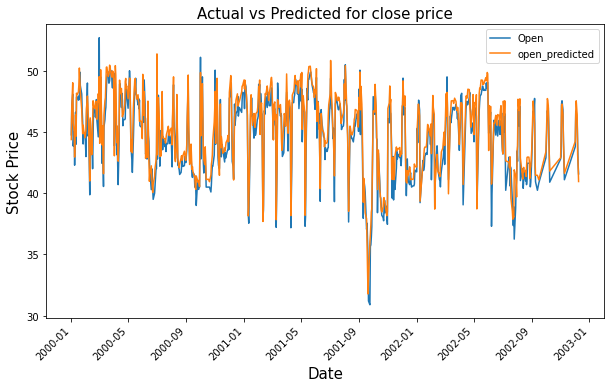

In [24]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel("Date",size=15)
plt.ylabel("Stock Price",size=15)
plt.title("Actual vs Predicted for close price",size=15)
plt.show()

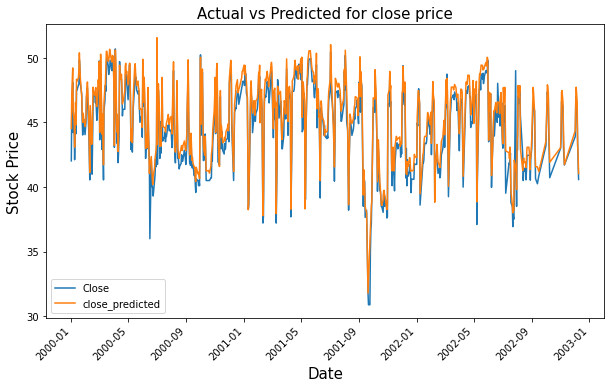

In [25]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel("Date",size=15)
plt.ylabel("Stock Price",size=15)
plt.title("Actual vs Predicted for close price",size=15)
plt.show()